# IDS Assignment 2
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

# Preprocessing and Data Quality 


###Question 1 (Order cancellations)
Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your answer:

In [66]:
#Modify the data set according to your recommendation
# I don't recommend to keep the order cancellation in my data set. Because the cancelled orders are unmeaningful. So I delete the orders with "C" in InvoiceNo.

import numpy as np
import pandas as pd

df = pd.DataFrame(pd.read_excel('Online Retail.xlsx'))
df = df[ ~ df['InvoiceNo'].str.contains('C', na=False) ]  #delete the rows, which start with the letter "C"
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


###Question 2 (Empty values)
The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

Your answer:

In [2]:
#Modify the data set according to your recommendation
total = df.isnull().sum().sort_values(ascending=False)
print(total)  #According the results, we can see, there are 134697 empty values in CustomerID and 1454 empty values in Description. 
                #However, I haven't use these two attributes to analysis the under questions. I keep them at my dataset. 
                #The numbver of empty values in CustomerID is very large, if I just delete them, my result will be affected.

CustomerID     134697
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64


###Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


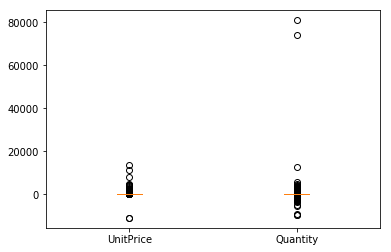

the boxplot before cleaning


In [68]:
#Your code
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot() 
ax.boxplot([df['UnitPrice'], df['Quantity']], whis=1.5)
ax.set_xticks([1, 2])
ax.set_xticklabels(['UnitPrice', 'Quantity'])
plt.show()
df.describe()
print('the boxplot before cleaning')

the range of UnitPrice: 8.45 -3.0700000000000003
the range of Quantity: 23.5 -12.5


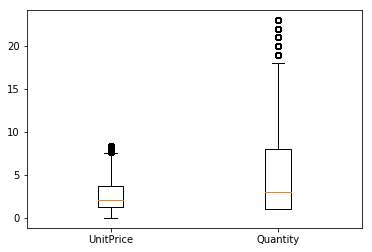

the after before cleaning


In [78]:
L_UnitPrice = list(df['UnitPrice'])            
Q11 = np.percentile(L_UnitPrice, 25)
Q31 = np.percentile(L_UnitPrice, 75)
up_edge1 = Q31 + 1.5*(Q31-Q11)
down_edge1 = Q11 - 1.5*(Q31-Q11)
print('the range of UnitPrice:', up_edge1,down_edge1)

L_Quantity = list(df['Quantity'])                   
Q12 = np.percentile(L_Quantity, 25)
Q32 = np.percentile(L_Quantity, 75)
up_edge2 = Q32 + 1.5*(Q32-Q12)
down_edge2 = Q12 - 1.5*(Q32-Q12)
print('the range of Quantity:',up_edge2,down_edge2)

df2 = df[df['Quantity'] >= 0]
df2 = df2[df2['Quantity'] <= up_edge2]
df2 = df2[df2['UnitPrice'] >= 0]
df2 = df2[df2['UnitPrice'] <= up_edge1]

fig = plt.figure()
ax = plt.subplot() 
ax.boxplot([df2['UnitPrice'], df2['Quantity']], whis=1.5)
ax.set_xticks([1, 2])
ax.set_xticklabels(['UnitPrice', 'Quantity'])
plt.show()
df2.describe()
print('the after before cleaning')

Your explanation: I use the boxplot to remove the outliers. In the original dataset there are many number, which are too large or too small, they are unreasonable. I decide to use boxplot to remove outerliers. However in the range of UnitPrice and Quantity there are negative number. I also delete the negative values in these two attributes.

#Visualization

###Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [77]:
#your modification

data = df2[df2.Country.isin(["Belgium","EIRE","France","Germany","Netherlands","Norway","Portugal","Spain","Switzerland"])]
data
# data is a new data set, which only contains "Belgium","EIRE","France","Germany","Netherlands","Norway","Portugal","Spain" 
# these countries in attribute Country.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France
41,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583.0,France
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


4. (b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [78]:
#your modification
import warnings
warnings.filterwarnings("ignore")

data_B = df2[df2.Country.isin(["Belgium"])]
data_B = data_B.set_index('InvoiceDate')
group1 = data_B['Quantity'].resample('M',how=sum)

data_E = df2[df2.Country.isin(["EIRE"])]
data_E = data_E.set_index('InvoiceDate')
group2 = data_E['Quantity'].resample('M',how=sum)

data_F = df2[df2.Country.isin(["France"])]
data_F = data_F.set_index('InvoiceDate')
group3 = data_F['Quantity'].resample('M',how=sum)
  
data_G = df2[df2.Country.isin(["Germany"])]
data_G = data_G.set_index('InvoiceDate')
group4 = data_G['Quantity'].resample('M',how=sum)

data_N = df2[df2.Country.isin(["Netherlands"])]
data_N = data_N.set_index('InvoiceDate')
group5 = data_N['Quantity'].resample('M',how=sum)

data_No = df2[df2.Country.isin(["Norway"])]
data_No = data_No.set_index('InvoiceDate')
group6 = data_No['Quantity'].resample('M',how=sum)
  
data_P = df2[df2.Country.isin(["Portugal"])]
data_P = data_P.set_index('InvoiceDate')
group7 = data_P['Quantity'].resample('M',how=sum)
  
data_S = df2[df2.Country.isin(["Spain"])]
data_S = data_S.set_index('InvoiceDate')
group8 = data_S['Quantity'].resample('M',how=sum)

data_Sw = df2[df2.Country.isin(["Switzerland"])]
data_Sw = data_Sw.set_index('InvoiceDate')
group9 = data_Sw['Quantity'].resample('M',how=sum)



df_per_months = pd.DataFrame()  
df_per_months["Belgium"] = group1
df_per_months["EIRE"] = group2
df_per_months["France"] = group3
df_per_months["Germany"] = group4
df_per_months["Netherlands"] = group5
df_per_months["Norway"] = group6
df_per_months["Portugal"] = group7
df_per_months["Spain"] = group8
df_per_months["Switzerland"] = group9.fillna(0)

df_per_months # df_per_months is a new dataframe, which shows per month for each country how many purchases were made.

,Belgium,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland
InvoiceDate,,,,,,,,,
2010-12-31,485,2113,2462,3094,77,546,889,278,334.0
2011-01-31,341,710,4409,5137,482,0,709,2037,911.0
2011-02-28,725,2323,2909,1932,214,264,356,569,552.0
2011-03-31,1013,3461,3003,3725,374,147,887,1178,349.0
2011-04-30,836,1896,1348,3237,34,0,583,516,466.0
2011-05-31,1080,3604,4594,5120,374,0,273,566,1115.0
2011-06-30,1646,3362,3860,4121,730,954,342,1092,592.0
2011-07-31,772,3676,3072,5290,9,300,839,717,1012.0
2011-08-31,1192,3617,4400,5865,319,423,266,906,1773.0


4. (c) Use the modified data to create a stream graph. 

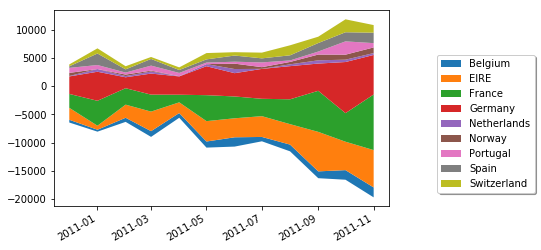

In [79]:
#your code
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


dates = ['12/2010', '01/2011','02/2011','03/2011','04/2011','05/2011','06/2011','07/2011','08/2011','09/2011','10/2011','11/2011','12/2011' ]
xs = [datetime.strptime(d, '%m/%Y').date() for d in dates]

# the values that will be stacked on top of each other
y1 = df_per_months["Belgium"]
y2 = df_per_months["EIRE"] 
y3 = df_per_months["France"] 
y4 = df_per_months["Germany"]
y5 = df_per_months["Netherlands"] 
y6 = df_per_months["Norway"]
y7 = df_per_months["Portugal"]
y8 = df_per_months["Spain"] 
y9 = df_per_months["Switzerland"]

#stacking our values vertically
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9])
labels = ["Belgium","EIRE","France","Germany","Netherlands","Norway","Portugal","Spain","Switzerland"]
fig, ax = plt.subplots()
#modifying the axis
ax.stackplot(xs, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels = labels, baseline='wiggle')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.gcf().autofmt_xdate()

plt.show()


4. (d) Use this graph to compare the purchases made by each country. 

Your answer: In this graph the number of purchases in EIRE and Belgium were considerable decrease occurred from 2010/12 to 2011/12.
Over the period from2010/12 to 2011/12 the number of purchases in France and Germany remained level.
The number of other countries saw a sharp rise.

### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [80]:
#your modification
data = df2[df2.Country.isin(["Belgium","EIRE","France","Germany","Netherlands","Norway","Portugal","Spain","Switzerland"])]
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France
41,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583.0,France
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


5. (b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [82]:
#your modification
data['Money'] = data['Quantity']*data['UnitPrice'] 
data

import warnings
warnings.filterwarnings("ignore")

Money_B = data[data.Country.isin(["Belgium"])]
Money_B = Money_B.set_index('InvoiceDate')
Money1 = Money_B['Money'].resample('M',how=sum)

Money_E = data[data.Country.isin(["EIRE"])]
Money_E = Money_E.set_index('InvoiceDate')
Money2 = Money_E['Money'].resample('M',how=sum)

Money_F = data[data.Country.isin(["France"])]
Money_F = Money_F.set_index('InvoiceDate')
Money3 = Money_F['Money'].resample('M',how=sum)

Money_G = data[data.Country.isin(["Germany"])]
Money_G = Money_G.set_index('InvoiceDate')
Money4 = Money_G['Money'].resample('M',how=sum)

Money_N = data[data.Country.isin(["Netherlands"])]
Money_N = Money_N.set_index('InvoiceDate')
Money5 = Money_N['Money'].resample('M',how=sum)

Money_No = data[data.Country.isin(["Norway"])]
Money_No = Money_No.set_index('InvoiceDate')
Money6 = Money_No['Money'].resample('M',how=sum)

Money_P = data[data.Country.isin(["Portugal"])]
Money_P = Money_P.set_index('InvoiceDate')
Money7 = Money_P['Money'].resample('M',how=sum)

Money_S = data[data.Country.isin(["Spain"])]
Money_S = Money_S.set_index('InvoiceDate')
Money8 = Money_S['Money'].resample('M',how=sum)

Money_Sw = data[data.Country.isin(["Switzerland"])]
Money_Sw = Money_Sw.set_index('InvoiceDate')
Money9 = Money_Sw['Money'].resample('M',how=sum)

Money_per_month = pd.DataFrame()  
Money_per_month["Belgium"] = Money1
Money_per_month["EIRE"] = Money2
Money_per_month["France"] = Money3
Money_per_month["Germany"] = Money4
Money_per_month["Netherlands"] = Money5
Money_per_month["Norway"] = Money6
Money_per_month["Portugal"] = Money7
Money_per_month["Spain"] = Money8
Money_per_month["Switzerland"] = Money9

Money_per_month   #Money_per_month is a new dataframe, which shows per month how much money was spent in the shop per country..

,Belgium,EIRE,France,Germany,Netherlands,Norway,Portugal,Spain,Switzerland
InvoiceDate,,,,,,,,,
2010-12-31,754.97,5396.81,5154.11,6476.70,191.96,1134.02,1890.94,562.13,790.46
2011-01-31,694.25,1590.32,9150.90,9554.05,1123.18,0.00,1534.25,4514.46,1725.73
2011-02-28,1448.95,5402.82,5503.02,4600.12,582.10,502.40,882.48,1149.31,1209.22
2011-03-31,2056.04,7421.68,5923.75,7165.19,723.54,311.01,1728.96,2414.29,817.19
2011-04-30,1505.02,3783.90,2849.19,6812.35,38.80,0.00,1352.71,1110.84,1058.31
2011-05-31,1700.30,8638.74,8902.44,10189.28,1320.38,0.00,552.33,1271.08,2292.37
2011-06-30,3120.24,7270.42,7759.49,8606.36,2016.81,2863.82,698.66,2128.18,1693.62
2011-07-31,1437.82,7580.35,5911.24,10234.49,11.02,568.88,1515.47,1402.73,2327.79
2011-08-31,2110.20,8501.57,7973.97,11585.26,1269.29,947.32,394.90,1909.56,3766.10


5. (c) Use the modified data to create a heat map. 

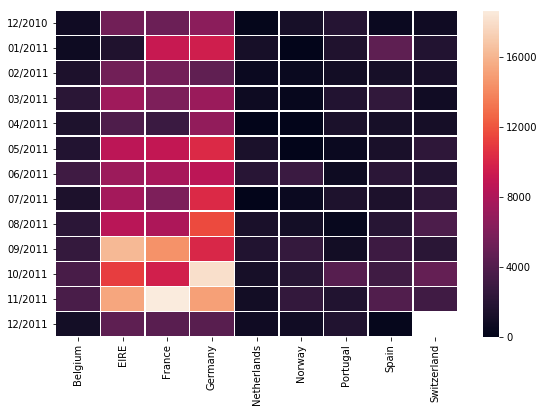

In [83]:
#your code
import seaborn as sns

Index= ['12/2010', '01/2011','02/2011','03/2011','04/2011','05/2011','06/2011','07/2011','08/2011','09/2011','10/2011','11/2011','12/2011']
Cols = ["Belgium","EIRE","France","Germany","Netherlands","Norway","Portugal","Spain","Switzerland"]
df_heatmap= DataFrame(Money_per_month.values, index=Index, columns=Cols)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap, annot=False, linewidths=.5, ax=ax)


5. (d) Compare the amount of the purchases over time and between each country. 

Your answer: EIRE, France and Germany were spent most money of the purchases. From 2011/08 to 2011/11, these three countries were spent the most of this year. The difference of the other countries were not obvious.

###Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


Your answer:  EIRE was the only country, which was spent most money and made the least purchases. France was spent the most money but it made the less purchases. It was a contradiction. the situation in germany was opposite.

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

###Question 7 (Data transformation and clustering)
7. (a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [86]:
# your code
from collections import Counter
occurerence = df2['StockCode'].str.split(expand=True).stack().value_counts()
col_top100 = occurerence[0:100,].index.tolist()
print(col_top100)
cluster_dataset = df2[df2['StockCode'].isin(col_top100)]
cluster_dataset


['85123A', '85099B', '85099C', '82494L', '85099F', '84596B', '84997D', '84970S', '47591D', '84029G', '84596F', '85049E', '84970L', '84029E', '47590B', '47590A', '84997B', '15056N', '84536A', '84032A', '84030E', '84997C', '85049A', '47566B', '85014B', '47559B', '84406B', '85049G', '15056BL', '84032B', '85014A', '84510A', '84997A', '84596G', '85049C', '84509A', '47593B', '85199S', '85131D', '47504K', '35471D', '85049H', 'M', '51014A', '85132C', '72351B', '48173C', '46000S', '85131B', '85039B', '85040A', '84536B', '84912B', '85184C', '85039A', '75049L', '84596L', '84031A', '84535B', '85231B', '72351A', '85017B', '47599A', '72807C', '85034C', '85032C', '72800E', '51014C', '79066K', '84031B', '46000M', '85032A', '85032B', '15056P', '47567B', '84913A', '85061W', '84279P', '84971S', '84519B', '15060B', '47310M', '85035C', '51014L', '47574A', '85131A', '84849D', '85049D', '72349B', '82613D', '82613B', '47599B', '85183B', '85206A', '85071B', '84796B', '72807B', '47504H', '47563A', '15044A']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom


7. (b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [ ]:
# your code
from sklearn import preprocessing
InvoiceNo = cluster_dataset[['InvoiceNo']]
InvoiceNo_dummies=  pd.get_dummies(InvoiceNo)

StockCode = cluster_dataset[['StockCode']]
StockCode_dummies =  pd.get_dummies(StockCode)

index_values = InvoiceNo_dummies.values
col_values = StockCode_dummies.values
cluster_dataset_new = np.array(list(zip(index_values, col_values)))
cluster_dataset_new

7. (c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

In [79]:
# your code
# sorry, I haven't solved these three questions. 

Your explanation:

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
###Question 8 (Data transformation and mining frequent itemsets and association rules)
8. (a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

In [0]:
# your code

8. (b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

In [0]:
# your code

#Text Mining
###Question 12 (Model based on binary document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier.

In [22]:
# nltk's default stoplist:
#from nltk.corpus import stopwords
#stoplist = set(stopwords.words('english'))

# your code
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import csv
import re
import string

data_train = pd.read_csv('pg_train.csv', sep='delimiter', header=None,engine='python') 

data_train = data_train[0].str.split('#',expand=True) #separate original dataset into two columns
data_train.columns = ['label','Text']

data_train.Text = data_train.Text.apply(lambda x: x.lower()) #All text lowercase
remove=string.punctuation                                              #No punctuation and Tokenization
table=str.maketrans('','',remove)
data_train.Text = data_train.Text.apply(lambda x: x.translate(table))

from nltk.corpus import stopwords
stoplist = set(stopwords.words('english')) #Stopword removal
word_list = data_train.Text
data_train.Text = [word for word in word_list if word not in stoplist]

from nltk.stem.porter import PorterStemmer #Stemming
tokens = data_train.Text
porter = PorterStemmer()
data_train.Text = [porter.stem(word) for word in tokens]

train_X = data_train['Text']
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(train_X)
Matrix_binary = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(Matrix_binary)   #Obtain a binary document-term matrix

      000  10  11  119  12  13  1350  14  15  1599  ...    zealous  zealously  \
0       0   0   0    0   0   0     0   0   0     0  ...          0          0   
1       0   0   0    0   0   0     0   0   0     0  ...          0          0   
2       0   0   0    0   0   0     0   0   0     0  ...          0          0   
3       0   0   0    0   0   0     0   0   0     0  ...          0          0   
4       0   0   0    0   0   0     0   0   0     0  ...          0          0   
5       0   0   0    0   0   0     0   0   0     0  ...          0          0   
6       0   0   0    0   0   0     0   0   0     0  ...          0          0   
7       0   0   0    0   0   0     0   0   0     0  ...          0          0   
8       0   0   0    0   0   0     0   0   0     0  ...          0          0   
9       0   0   0    0   0   0     0   0   0     0  ...          0          0   
10      0   0   0    0   0   0     0   0   0     0  ...          0          0   
11      0   0   0    0   0  

In [28]:
#preprocessed and converted the test data in the same way as the training data
data_test = pd.read_csv('pg_test.csv', sep='delimiter', header=None,engine='python') 
data_test = data_test[0].str.split('#',expand=True)
data_test.columns =['label','Text']

data_test.Text= data_test.Text.apply(lambda x: x.lower())
remove=string.punctuation
table=str.maketrans('','',remove)
data_test.Text = data_test.Text.apply(lambda x: x.translate(table))

from nltk.corpus import stopwords
stoplist1 = set(stopwords.words('english'))
word_list1 = data_test.Text
data_test.Text = [word for word in word_list1 if word not in stoplist1]

from nltk.stem.porter import PorterStemmer
tokens = data_test.Text
porter = PorterStemmer()
data_test.Text = [porter.stem(word) for word in tokens]


In [41]:
#train a logistic regression classifier
X_train = vectorizer.transform(data_train['Text'])
y_train = data_train['label']

from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=4, dual=True)
classifier1.fit(X_train, y_train)


###Question 13 (Model based on document-term matrix of counts)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier.


In [4]:
# your code
corpus = data_train['Text']
cv = CountVectorizer()
cv_fit=cv.fit_transform(corpus)

Matrix_counts = pd.DataFrame(cv_fit.toarray(), columns=cv.get_feature_names())

#train a logistic regression classifier
X_train_counts = cv.fit_transform(data_train['Text'])
y_train = data_train['label']
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C=4, dual=True)
classifier2.fit(X_train_counts, y_train)

Matrix_counts   #Obtain a document-term matrix of counts

###Question 14 (Model based on tf-idf document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [5]:
# your code
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
train_X = data_train['Text']

vectorizer=CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(train_X)) 
Matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=cv.get_feature_names())
Matrix_tfidf     #Obtain a document-term matrix of tf-idf scores


#train a logistic regression classifier
X_train_tfidf = transformer.fit_transform(vectorizer.fit_transform(train_X)) 
y_train = data_train['label']
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(C=4, dual=True)
classifier3.fit(X_train_tfidf, y_train)



,000,10,11,119,12,13,1350,14,15,1599,...,zealous,zealously,zem,zigzags,zmite,zoetrope,zolas,zoological,zso,zumpt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Question 15 (Model based on doc2vec)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier.


In [54]:
# your code

import gensim
from gensim.models import Doc2Vec
from tqdm import tqdm

data_train_tagged = []
data_test_tagged = []
for i in range (0, len(data_train.Text)):
    data_train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(data_train.Text[i]), tags=[i]))
print(repr(data_train_tagged[0]))

import multiprocessing
cores = multiprocessing.cpu_count()

doc2vec_model = Doc2Vec(dm=0, vector_size=40, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(data_train_tagged)])

from sklearn import utils

for epoch in range(300):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(data_train_tagged)]), total_examples=len(data_train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha
    



100%|██████████| 4499/4499 [00:00<00:00, 2231572.10it/s]

TaggedDocument(words=['emma', 'by', 'jane', 'austen', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'very', 'early', 'period', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'little', 'short', 'of'


100%|██████████| 4499/4499 [00:00<00:00, 2798068.46it/s]


100%|██████████| 4499/4499 [00:00<00:00, 3104668.26it/s]


In [81]:
def vec_for_learning(model, tagged_docs):
    targets, doc2vec_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=300)) for doc in tagged_docs])
    return targets, doc2vec_vectors
y_train_doc, X_train_doc = vec_for_learning(doc2vec_model,data_train_tagged )
y_test_doc, X_test_doc = vec_for_learning(doc2vec_model, data_test_tagged)

from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(n_jobs=1, C=1e5)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


ValueError: not enough values to unpack (expected 2, got 0)

###Question 16 (Evaluation)
16. (a) Predict the classification with the four models on the test data.


In [65]:
# your code
#the classification of binary matrix
X_train_binary = vectorizer.transform(data_train['Text'])
X_test = vectorizer.transform(data_test['Text'])
y_train_binary = data_train['label']
y_test = data_test['label']

from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=4, dual=True)
classifier1.fit(X_train_binary, y_train)
y_pred1 = classifier1.predict(X_test)
print('model1_Coefficients: \n', classifier1.coef_)
print('model1_Intercept: \n', classifier1.intercept_)

#the classification of counts matrix
cv = CountVectorizer()
X_train_counts = cv.fit_transform(data_train['Text'])
y_train = data_train['label']
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(C=4, dual=True)
classifier2.fit(X_train_counts, y_train)
y_pred2 = classifier2.predict(X_test)
print('model2_Coefficients: \n', classifier2.coef_)
print('model2_Intercept: \n', classifier2.intercept_)

#the classification of tfidf
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(vectorizer.fit_transform(train_X)) 
y_train = data_train['label']
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(C=4, dual=True)
classifier3.fit(X_train_tfidf, y_train)
y_pred3 = classifier3.predict(X_test)
print('model3_Coefficients: \n', classifier3.coef_)
print('model3_Intercept: \n', classifier3.intercept_)


model1_Coefficients: 
 [[-1.77373398e-02  2.91750578e-02  1.43542914e-04 ... -3.63467322e-06
  -2.50886819e-02 -1.55402840e-03]
 [ 1.64516464e-02 -1.52130570e-02 -8.90860478e-05 ...  6.34759843e-07
   1.61588043e-01  3.22747448e-04]
 [-2.45568181e-04 -1.73112197e-03 -9.69062565e-05 ... -3.42564792e-05
  -1.16876363e-01 -8.62263380e-06]]
model1_Intercept: 
 [-2.61941055 -2.85431945  2.24382188]
model2_Coefficients: 
 [[-1.88200682e-04  3.12715859e-02  1.20015250e-05 ... -1.58742359e-05
  -5.02273100e-02 -5.43597679e-04]
 [ 2.96976654e-04 -6.86573456e-03 -2.89301069e-06 ...  1.77463154e-06
   1.86760254e-01  1.35757382e-04]
 [-3.07748156e-06 -7.16242562e-03 -7.28583699e-07 ... -7.76379098e-06
  -1.63333024e-01 -8.58269579e-07]]
model2_Intercept: 
 [-2.57735138 -2.54035847  1.97943429]
model3_Coefficients: 
 [[ 0.0042189   0.1793951   0.04526542 ... -0.00646956 -0.03247924
  -0.04207795]
 [ 0.06313831 -0.11133843 -0.03252754 ...  0.00492089  0.1982317
   0.06018371]
 [-0.04014676 -0.03987

16. (b) Obtain confusion matrices for the four different models.


In [61]:
# your code
#the confusion matrices of binary matrix
y_pred1 = classifier1.predict(X_train_binary)
y_pred1 = np.array(y_pred1)
true_y1 = np.array(y_pred1)
pd.crosstab(np.array(true_y1), np.array(y_pred1), rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,2062,0,0,2062
chesterton,0,1541,0,1541
shakespeare,0,0,896,896
All,2062,1541,896,4499


In [62]:
#the confusion matrices of counts matrix
y_pred2 = classifier2.predict(X_train_counts)
y_pred2 = np.array(y_pred2)
true_y2 = np.array(y_pred2)
pd.crosstab(np.array(true_y2), np.array(y_pred1), rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,austen,chesterton,shakespeare,All
True,,,,
austen,1980,1,1,1982
chesterton,82,1540,32,1654
shakespeare,0,0,863,863
All,2062,1541,896,4499


In [ ]:
y_pred3 = classifier3.predict(X_train_tfidf)
y_pred3 = np.array(y_pred3)
true_y3 = np.array(y_pred3)
pd.crosstab(np.array(true_y3), np.array(y_pred1), rownames=['True'], colnames=['Predicted'], margins=True)


16. (c) Obtain accuracy and f1 score for the four different models.


In [58]:
# your code
from sklearn.metrics import accuracy_score
acc1 = classifier1.score(X_test,y_test)
print('accuracy on test data of binary matrix: ', acc1)

acc2 = classifier2.score(X_test,y_test)
print('accuracy on test data of counts matrix: ', acc2)

acc3 = classifier3.score(X_test,y_test)
print('accuracy on test data of tfidf: ', acc3)


accuracy on test data of binary matrix:  0.9853820598006644
accuracy on test data of counts matrix:  0.9754152823920266
accuracy on test data of tfidf:  0.7933554817275748


16. (d) Briefly comment on the quality of the predictions for the four models.

_Your comment:_  The models of binary document-term matrix and document matrix of counts have the highest accurancy. The accurancy of tfidf is lower than those two models.


# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
###Question 17 (Trace frequency)
17. (a) Use the provided event log and identify the least frequent traces and the most frequent traces.


In [1]:
# your code
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics

log = xes_importer.import_log('event_log.xes')
variants = variants_filter.get_variants(log)
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
print(variants_count)

# Max_trace_fre = variants_filter.apply(log,['Assigned Severity,Waiting,Under Processing,Solves,Closed'])
# variants_count_Max_trace_fre = case_statistics.get_variant_statistics(Max_trace_fre)

# Min_trace_fre = variants_filter.apply(log,['Assigned Severity,Under Processing,Waiting,Solves,Closed'])
# variants_count_Min_trace_fre = case_statistics.get_variant_statistics(Min_trace_fre)

# print(variants_count_Max_trace_fre)
# print(variants_count_Min_trace_fre)



[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}, {'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]


###Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18. (a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [84]:
# your code
filtered_log1 = variants_filter.apply(log,['Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed'],parameters={"positive": False})
filtered_log2 = variants_filter.apply(filtered_log1,['Assigned Severity,Under Processing,Waiting,Solves,Closed'], parameters={"positive": False})
new_log = filtered_log2
variants = variants_filter.get_variants(new_log)
new_variants_count = case_statistics.get_variant_statistics(new_log)
new_variants_count = sorted(new_variants_count, key=lambda x: x['count'], reverse=True)
print(new_variants_count)

[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}]


18. (b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


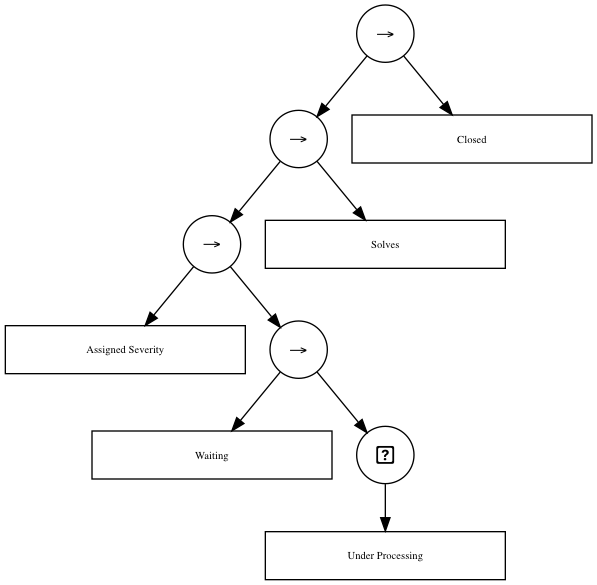

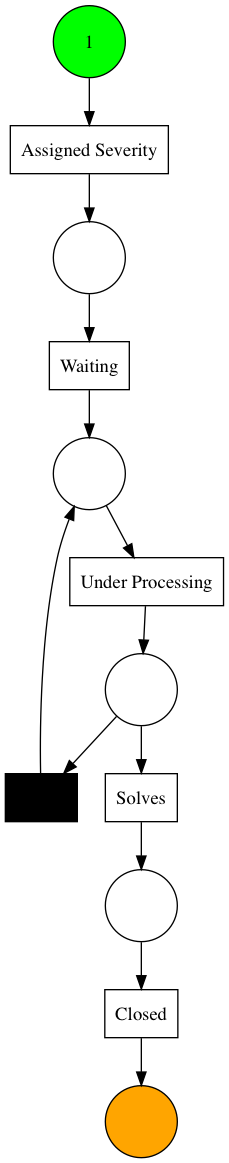

In [85]:
# your code
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

tree_no_min = inductive_miner.apply_tree(new_log)
gviz_tree_no_min = pt_vis_factory.apply(tree_no_min)
pt_vis_factory.view(gviz_tree_no_min)

from pm4py.visualization.petrinet import factory as pn_vis_factory
net, initial_marking_no_min, final_marking_no_min = inductive_miner.apply(new_log)
gviz_pn_no_min = pn_vis_factory.apply(net, initial_marking_no_min, final_marking_no_min)
pn_vis_factory.view(gviz_pn_no_min)

18. (c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [86]:
# your code
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory
#print(new_log[0])
token_replay_result_no_min = token_based_replay_factory.apply(new_log, net, initial_marking_no_min, final_marking_no_min)
print(token_replay_result_no_min[0])

net, initial_marking_orig, final_marking_orig = inductive_miner.apply(log)
token_replay_result_orig = token_based_replay_factory.apply(log, net, initial_marking_orig, final_marking_orig)
print(token_replay_result_orig[0])


{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, Waiting, Under Processing, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}
{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, tauSplit_1, Waiting, Under Processing, tauJoin_2, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}


Your explanation: I think it fit the model. Because the trace_fit is true.

18. (ci) Calculate the fitness of your model.

In [88]:
# your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay = replay_fitness_factory.apply(new_log, net, initial_marking_no_min, final_marking_no_min)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5151700143259568, 'log_fitness': 0.7255504557709591}


18. (cii) Are there any deviations between the process model and the event log?

Your explanation: I think yes. There are deviations between the process model and the event log. Because the average_trace is just 0.515 and the log_fitness is just 0,72. The number is not very high.

###Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19. (a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


[{'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]


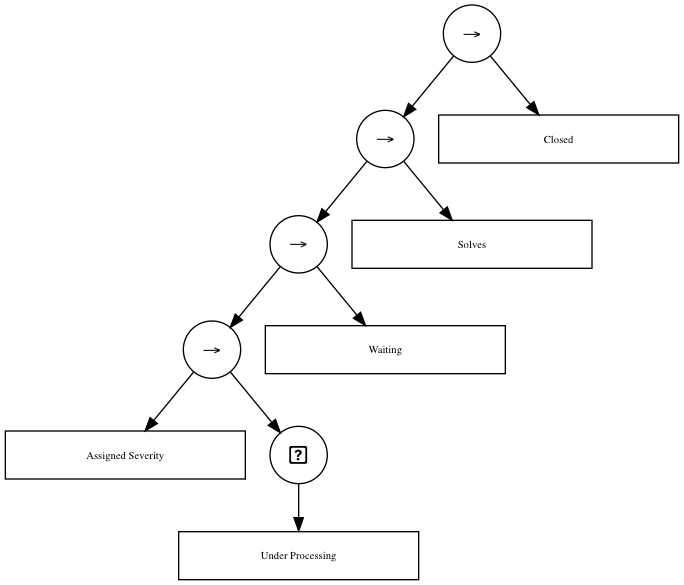

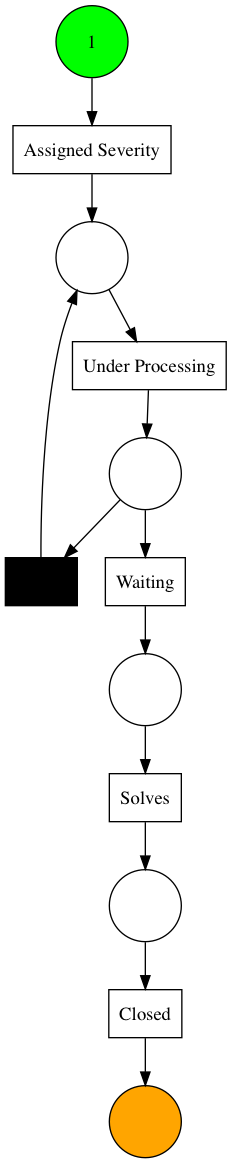

In [89]:
# your code
filtered_log3 = variants_filter.apply(log,['Assigned Severity,Waiting,Under Processing,Solves,Closed'],parameters={"positive": False})
filtered_log4 = variants_filter.apply(filtered_log3,['Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed'], parameters={"positive": False})
new_log2 = filtered_log4
variants = variants_filter.get_variants(new_log2)
new_variants_count2 = case_statistics.get_variant_statistics(new_log2)
new_variants_count2 = sorted(new_variants_count2, key=lambda x: x['count'], reverse=True)
print(new_variants_count2)

tree_no_max = inductive_miner.apply_tree(new_log2)
gviz_tree_no_max = pt_vis_factory.apply(tree_no_max)
pt_vis_factory.view(gviz_tree_no_max)

from pm4py.visualization.petrinet import factory as pn_vis_factory
net, initial_marking_no_max, final_marking_no_max = inductive_miner.apply(new_log2)
gviz_pn_no_max = pn_vis_factory.apply(net, initial_marking_no_max, final_marking_no_max)
pn_vis_factory.view(gviz_pn_no_max)

19. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [90]:
# your code
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay_factory

print(new_log2[0])
token_replay_result_no_max = token_based_replay_factory.apply(new_log2, net, initial_marking_no_max, final_marking_no_max)
print(token_replay_result_no_max[0])

net, initial_marking_orig, final_marking_orig = inductive_miner.apply(log)
token_replay_result_orig = token_based_replay_factory.apply(log, net, initial_marking_orig, final_marking_orig)
print(token_replay_result_orig[0])

{'attributes': {'concept:name': 'CAS-01293-0Q5CKQ'}, 'events': [{'lifecycle:transition': 'start', 'concept:name': 'Assigned Severity', 'time:timestamp': datetime.datetime(2010, 2, 10, 10, 36, 10)}, {'lifecycle:transition': 'start', 'concept:name': 'Under Processing', 'time:timestamp': datetime.datetime(2010, 2, 11, 11, 20, 32)}, {'lifecycle:transition': 'start', 'concept:name': 'Waiting', 'time:timestamp': datetime.datetime(2010, 2, 16, 12, 22, 24)}, {'lifecycle:transition': 'start', 'concept:name': 'Solves', 'time:timestamp': datetime.datetime(2010, 2, 24, 8, 49, 39)}, {'lifecycle:transition': 'start', 'concept:name': 'Closed', 'time:timestamp': datetime.datetime(2010, 3, 13, 10, 40, 41)}]}
{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, Under Processing, Waiting, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens

Your explanation: This is the same situation as above model. Because the trace_fitness is 1.0 and the result said, the trace_is _fit is true.

19. (bi) Calculate the fitness of your model?

In [45]:
# your code
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay = replay_fitness_factory.apply(new_log2, net, initial_marking_no_max, final_marking_no_max)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.5202628484471788, 'log_fitness': 0.7288939729212767}


19. (bii)  Is there any deviation inside the process model?

Your explanation: There are deviations between the process model and the event log. Because the average_trace is just 0.520 and the log_fitness is just 0,728. The number is not very high.

###Question 20 (Process Discovery using complete log)
20. (a) Use the complete event log (original event log) and discover your process model using inductive miner.


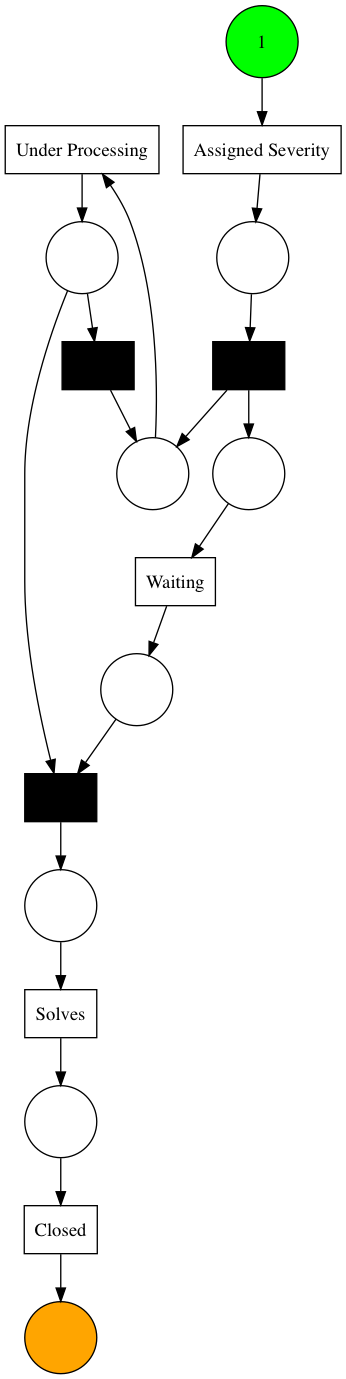

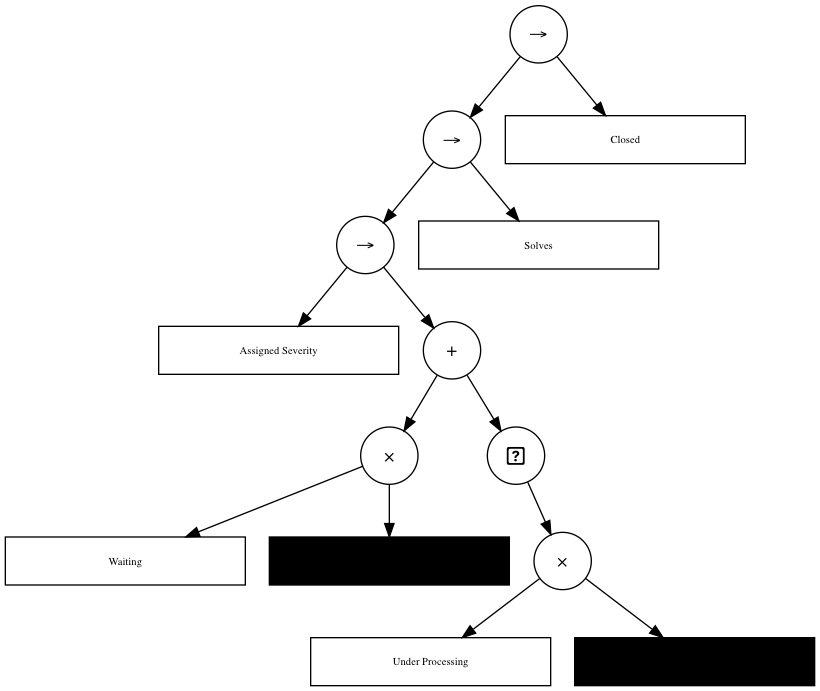

In [91]:
# your code
tree = inductive_miner.apply_tree(log)

net, initial_marking, final_marking = inductive_miner.apply(log)

gviz_pn = pn_vis_factory.apply(net, initial_marking, final_marking)
pn_vis_factory.view(gviz_pn)

gviz_tree = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz_tree)


20. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [48]:
# your code
net, initial_marking_orig, final_marking_orig = inductive_miner.apply(log)
token_replay_result_orig = token_based_replay_factory.apply(log, net, initial_marking_orig, final_marking_orig)
print(token_replay_result_orig[0])


fitness_tokenbasedreplay_orig = replay_fitness_factory.apply(log, net, initial_marking_orig, final_marking_orig)
print(fitness_tokenbasedreplay_orig)

{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [Assigned Severity, tauSplit_1, Waiting, Under Processing, tauJoin_2, Solves, Closed], 'reached_marking': ['sink:1'], 'enabled_transitions_in_marking': set(), 'transitions_with_problems': [], 'missing_tokens': 0, 'consumed_tokens': 5, 'remaining_tokens': 0, 'produced_tokens': 5}
{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0}


Your explanation: My process fit model. Because all the data are 1.0.

20. (c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation: The process of the last model is more complex than the other two. The last model, which has the original event log, is the best fiting to the original log. Because the value of fitness is the highest.